# Virgo Demo 3 - Advanced pipeline

In [1]:
from virgo.cluster import VirgoCluster
from virgo.kernel import VirgoKernel, VirgoSimpleKernel
from virgo.mixture import VirgoMixture, VirgoClustering
from virgo.cleaner import LowDensityCleaner

%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [2]:
file_name = "/home/max/Software/virgo/data/data.txt"
virgo_cluster = VirgoCluster(file_name=file_name, io_mode=0, cut_mach_dim=-1)
virgo_cluster.scale_data()
virgo_cluster.print_datastats()

Data set 0 - Shape: (671556, 8)
Mean / Std: 43920.488 / 135103.105
Min / Max: -7516.963 / 694763.000
Data set 1 - Shape: (671556, 7)
Mean / Std: 0.000 / 1.000
Min / Max: -4.529 / 8.530


In [3]:
virgo_kernel = VirgoSimpleKernel(virgo_cluster)
virgo_kernel()
virgo_cluster.print_datastats()

Data set 0 - Shape: (671556, 8)
Mean / Std: 43920.488 / 135103.105
Min / Max: -7516.963 / 694763.000
Data set 1 - Shape: (671556, 8)
Mean / Std: 2.599 / 11.813
Min / Max: -4.529 / 302.402


ELBO: -8.59226327164546
Mixture weights [0.04846238 0.18421426 0.02491986 0.18465893 0.00440741 0.05632831
 0.02226649 0.05656123 0.10078733 0.03427779 0.15040955 0.13270647]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([125360, 123940, 101539,  89213,  67550,  38789,  36885,  32733,
        22017,  15564,  14973,   2993]))


<IPython.core.display.Javascript object>


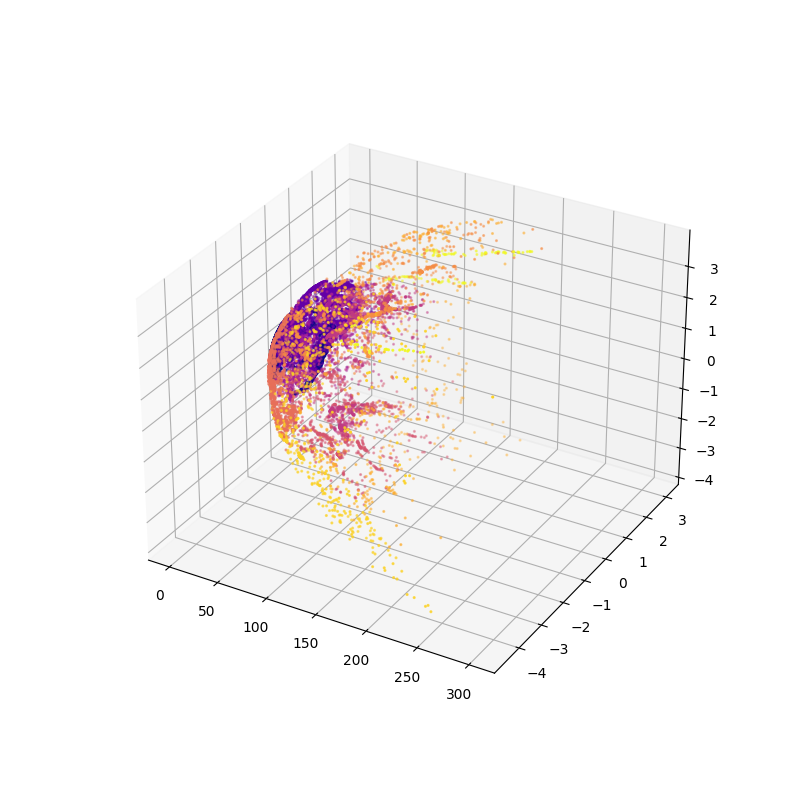

<IPython.core.display.Javascript object>


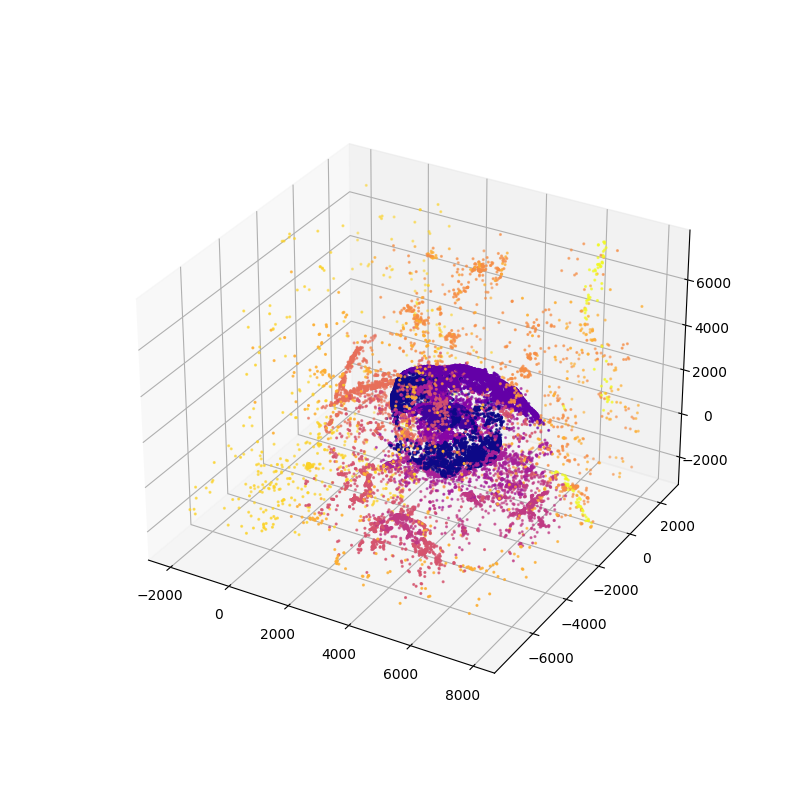

In [4]:
virgo_mixture = VirgoMixture(virgo_cluster, n_comp=12)
# virgo_mixture = VirgoMixture(virgo_cluster, n_comp=25, mixture_type="bayesian_gaussian")
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=False)
labels_removed = virgo_cluster.get_labels(return_counts=True)
print(labels_removed)

virgo_cluster.plot_cluster(n_step=25, plot_kernel_space=True)
virgo_cluster.plot_cluster(n_step=25, store_gif=False)

In [ ]:
# for i in virgo_cluster.get_labels()[1:]:
#     print(f"Label {i}, Counts {virgo_cluster.get_labels(return_counts=True)[1][i + 1]}")
#     virgo_cluster.plot_cluster(n_step=10, cluster_label=[i])

Cluster 0
Density: 6.492840391235667e-08
Cluster 1
Density: 4.9082507269723145e-06
Cluster 2
Density: 7.649235391425496e-08
Cluster 3
Density: 2.5792368999259705e-07
Cluster 4
Density: 1.1047783758372041e-08
Cluster 5
Density: 1.8404725569175462e-08
Cluster 6
Density: 1.2208411573717336e-09
Cluster 7
Density: 3.824662776297101e-08
Cluster 8
Density: 1.7774722499332113e-09
Cluster 9
Density: 1.6080434072914242e-10
Cluster 10
Density: 2.0454522109650306e-10
Cluster 11
Density: 9.716917511026348e-11
(array([-1,  0,  1,  2,  3,  4,  5,  6]), array([ 92432, 125360, 123940, 101539,  89213,  67550,  38789,  32733]))


/home/max/Software/virgo/virgo/cleaner.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.clusters = np.array(self.clusters)
/home/max/Software/virgo/virgo/cleaner.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.labels = np.array(self.labels)


<IPython.core.display.Javascript object>


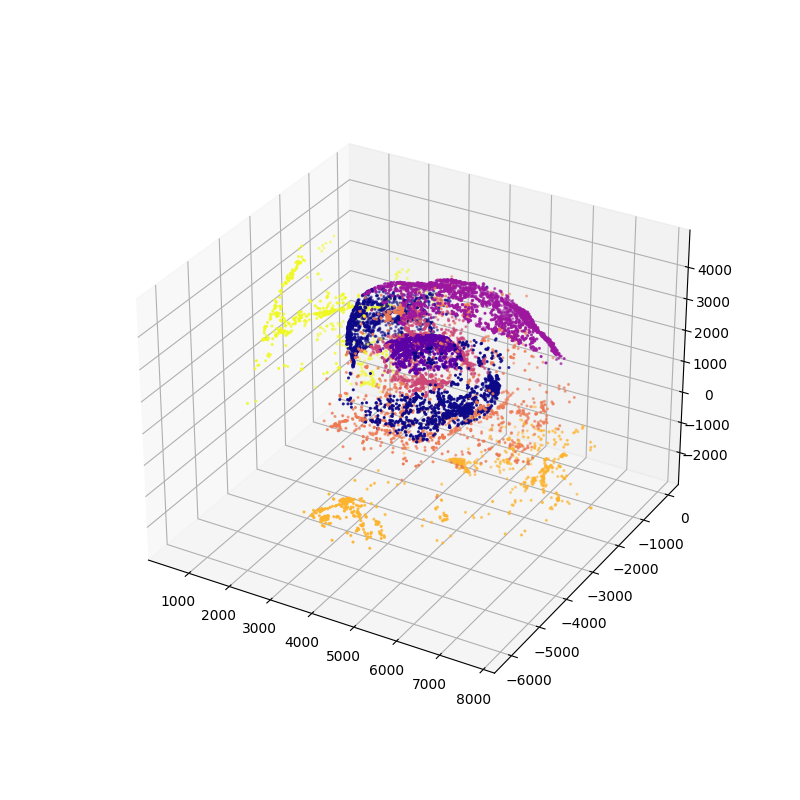

In [5]:
d_cleaner = LowDensityCleaner(virgo_cluster, 1e-8)
d_cleaner.clean()
print(virgo_cluster.get_labels(return_counts=True))
virgo_cluster.plot_cluster(n_step=50)

<IPython.core.display.Javascript object>


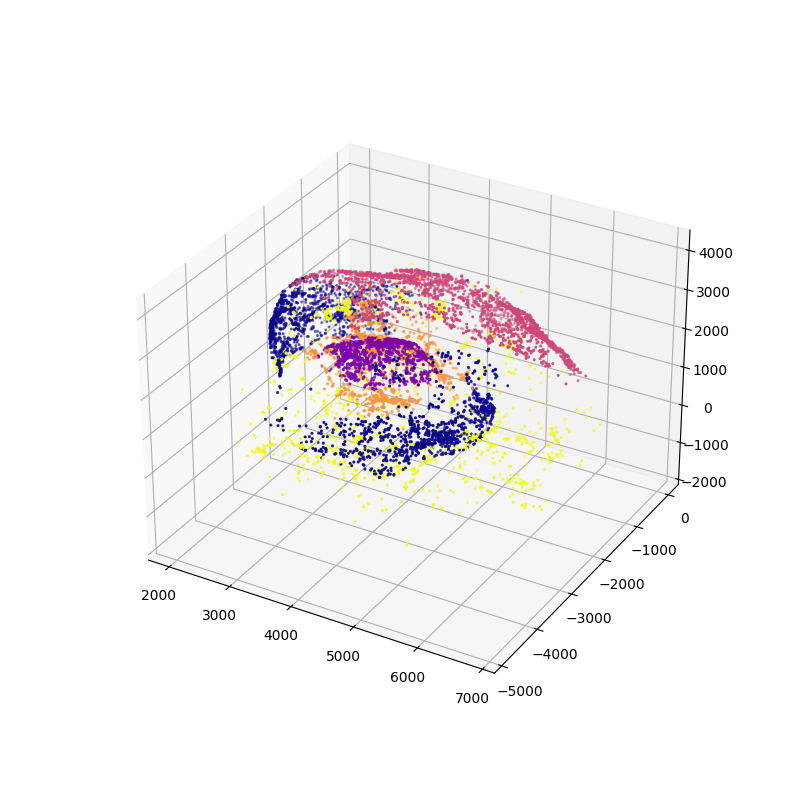

In [6]:
virgo_cluster.plot_cluster(n_step=50, cluster_label=[0, 1, 2, 3, 4])

In [ ]:
# virgo_cluster.export_cluster("vc_cleaned", remove_uncertain=True, remove_evno=True)

### After removing low density, start from the top

Should help with less spread and noisy covar

In [5]:
file_name = "/home/max/Software/virgo/demo_notebooks/vc_cleaned_cluster.txt"
# file_name = "/home/max/Software/virgo/data/data.txt"
virgo_cluster = VirgoCluster(file_name=file_name, n_max_data=25000)
# virgo_cluster = VirgoCluster(file_name=file_name)
virgo_cluster.scale_data(use_dim=[0, 1, 2])
# virgo_cluster.scale_data()
virgo_cluster.print_datastats()

Data set 0 - Shape: (25000, 8)
Mean / Std: 36457.266 / 112200.227
Min / Max: -6227.155 / 579060.000
Data set 1 - Shape: (25000, 3)
Mean / Std: 0.000 / 1.000
Min / Max: -4.108 / 3.168


In [ ]:
# virgo_kernel = VirgoKernel(virgo_cluster, spatial_dim=[0, 1, 2, 3, 4, 5], k_nystroem=4000, pca_comp=5)
virgo_kernel = VirgoKernel(virgo_cluster, k_nystroem=4000, pca_comp=5)
virgo_kernel()
virgo_cluster.print_datastats()

In [ ]:
# rbf
virgo_cluster.run_fof(linking_length=0.033, min_group_size=350, use_scaled_data=True)
# raw
# virgo_cluster.run_fof(linking_length=30., min_group_size=3000, use_scaled_data=False)

labels, counts = virgo_cluster.get_labels(return_counts=True)
print(len(labels))
print(labels, counts)
virgo_cluster.plot_cluster(n_step=1, plot_kernel_space=False, store_gif=True, gif_title="fof_kernel_kspace")
virgo_cluster.plot_cluster(n_step=1, store_gif=False, gif_title="fof_kernel")

In [ ]:
# virgo_mixture = VirgoMixture(virgo_cluster, n_comp=10, mixture_type="bayesian_gaussian")
# virgo_mixture = VirgoMixture(virgo_cluster, n_comp=10, fit_dim_ind=[0, 1, 2, 3, 4, 5])
virgo_mixture = VirgoMixture(virgo_cluster, n_comp=6)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=True)
labels_removed = virgo_cluster.get_labels(return_counts=True)
print(labels_removed)

virgo_cluster.plot_cluster(n_step=1, plot_kernel_space=True, store_gif=True, gif_title="gmm_kernel_kspace")
virgo_cluster.plot_cluster(n_step=1, store_gif=True, gif_title="gmm_kernel")

In [ ]:
# virgo_clustering = VirgoClustering(virgo_cluster, n_clusters=8, clustering_type="agglo")
# virgo_clustering.predict()
# labels_removed = virgo_cluster.get_labels(return_counts=True)
# print(labels_removed)

# virgo_cluster.plot_cluster(n_step=1, plot_kernel_space=True)
# virgo_cluster.plot_cluster(n_step=1)

In [ ]:
# virgo_clustering = VirgoClustering(virgo_cluster, n_clusters=10, clustering_type="spectral")
# virgo_clustering.predict()
# labels_removed = virgo_cluster.get_labels(return_counts=True)
# print(labels_removed)

# virgo_cluster.plot_cluster(n_step=5, plot_kernel_space=True)
# virgo_cluster.plot_cluster(n_step=5)

In [ ]:
# virgo_clustering = VirgoClustering(virgo_cluster, min_samples=10, clustering_type="dbscan")
# virgo_clustering.predict()
# labels_removed = virgo_cluster.get_labels(return_counts=True)
# print(labels_removed)

# virgo_cluster.plot_cluster(n_step=5, plot_kernel_space=True)
# virgo_cluster.plot_cluster(n_step=5)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
elbos = []
bics = []
for i in range(2, 45, 3):
    virgo_mixture = VirgoMixture(virgo_cluster, n_comp=i, mixture_type="gaussian")
    elbo = virgo_mixture.fit()
    elbos.append(elbo)
    bic = virgo_mixture.model.bic(virgo_cluster.scaled_data)
    bics.append(bic)
    print(i, elbo, bic)

print(elbos)
print(bics)

In [ ]:
plt.plot(elbos)
plt.show()   

In [ ]:
plt.plot(bics)
plt.show()  